In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error ,mean_absolute_percentage_error, root_mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S3_Datafile_Practice.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

series = df['Close_diff'].dropna()

In [3]:
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

model = ARIMA(train, order=(1 , 0 , 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


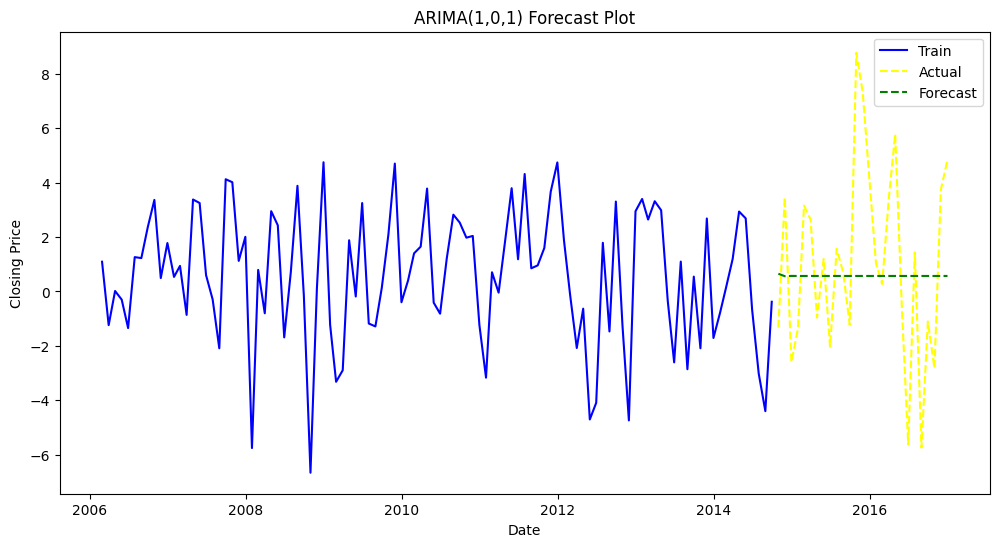

In [4]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='yellow', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('ARIMA(1,0,1) Forecast Plot')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [5]:
mae = mean_absolute_error(test, forecast)
rmse = root_mean_squared_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)

print(f'Mean Absolute Error (MAE): {mae: .4f}')
print(f'Root Mean Squared Error (RMSE): {rmse: .4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape: .4f}') 

Mean Absolute Error (MAE):  2.8370
Root Mean Squared Error (RMSE):  3.5195
Mean Absolute Percentage Error (MAPE):  1.0185


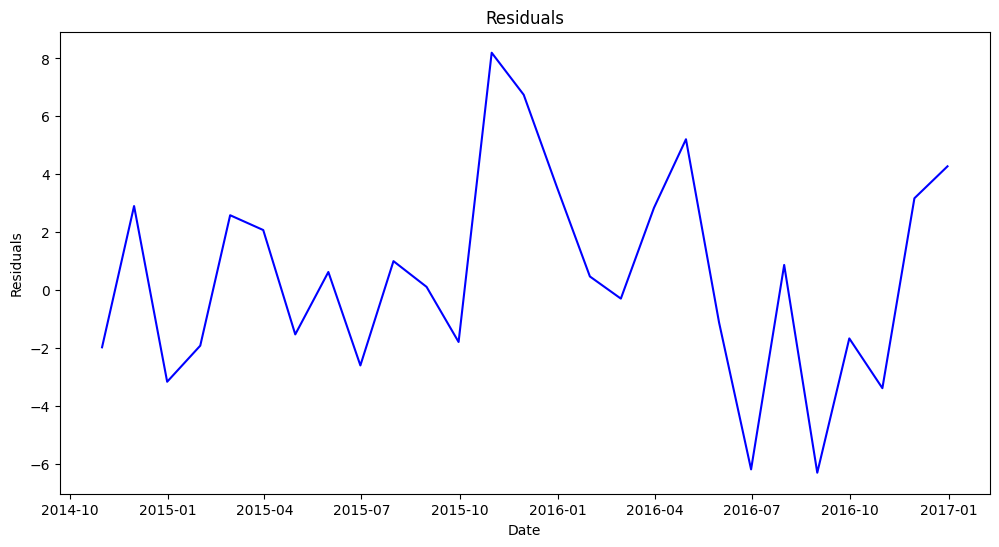

In [6]:
residuals = test - forecast

plt.figure(figsize=(12,6))
plt.plot(residuals.index, residuals, label='Residuals', color='blue')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()